In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np

In [2]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [3]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [4]:
df = pd.read_json("scout_car.json", lines=True)

In [5]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,NaN,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [7]:
df[["price"]].sort_values(by="price",axis=0)

,price
8594,13
8828,120
6066,255
8829,331
8827,4950
...,...
15828,64332
3587,64900
3649,67600
15826,68320


In [8]:
#Delete rows that price is lower than 500Euros
#df.drop(df[df["price"]<500].index,inplace=True)

In [9]:
def get_df_wo_outlier(df,range=1.5):
    Q1 = df.quantile(q=0.25)
    Q3 = df.quantile(q=0.75)
    IQR = Q3-Q1
    return df[~((df <  Q1-(range*IQR)) |(df > Q3+(range*IQR))) ]

In [10]:
df[df["price"].isnull()]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from


In [11]:
df["price"]

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 15919, dtype: int64

In [12]:
df["price"]

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 15919, dtype: int64

<AxesSubplot:xlabel='price'>

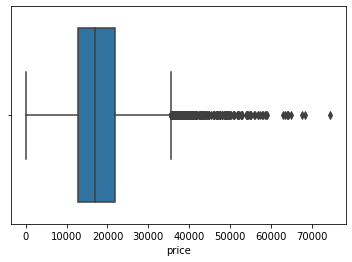

In [13]:
sns.boxplot(x='price',data = df)

In [14]:
get_df_wo_outlier(df["price"])

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15791    33990
15792    33975
15793    33990
15794    33975
15795    34200
Name: price, Length: 15440, dtype: int64

In [15]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [16]:
#fix column names by deleting "\n" in it.
df.rename(columns=lambda x: x.replace("\n",""),inplace=True)

In [25]:
#fix values at rows by deleting "\n" in it.
dfdeneme  = df.replace("\n","")

In [19]:
#to have a quick look at data, which columns contain what and how many.
for i in df.columns:
    print(df[i].value_counts().rename_axis(i +' unique_values').reset_index(name=i +' counts'))


                                       url unique_values  url counts
0      https://www.autoscout24.com//offers/audi-a1-sp...           1
1      https://www.autoscout24.com//offers/audi-a1-1-...           1
2      https://www.autoscout24.com//offers/audi-a1-sp...           1
3      https://www.autoscout24.com//offers/audi-a3-sp...           1
4      https://www.autoscout24.com//offers/audi-a1-1-...           1
...                                                  ...         ...
15914  https://www.autoscout24.com//offers/opel-corsa...           1
15915  https://www.autoscout24.com//offers/audi-a1-1-...           1
15916  https://www.autoscout24.com//offers/audi-a3-sp...           1
15917  https://www.autoscout24.com//offers/opel-insig...           1
15918  https://www.autoscout24.com//offers/opel-insig...           1

[15919 rows x 2 columns]
  make_model unique_values  make_model counts
0                  Audi A3               3097
1                  Audi A1               2614
2       

               Next Inspection unique_values  Next Inspection counts
0                                \n04/2022\n                      62
1                                \n03/2021\n                      38
2                                \n03/2022\n                      36
3                                \n06/2021\n                      34
4                                \n01/2022\n                      32
...                                      ...                     ...
1394  [\n03/2020\n, \n164 g CO2/km (comb)\n]                       1
1395  [\n11/2021\n, \n149 g CO2/km (comb)\n]                       1
1396  [\n07/2021\n, \n116 g CO2/km (comb)\n]                       1
1397  [\n09/2019\n, \n107 g CO2/km (comb)\n]                       1
1398  [\n11/2021\n, \n143 g CO2/km (comb)\n]                       1

[1399 rows x 2 columns]
                          Inspection new unique_values  Inspection new counts
0                                [\nYes\n, \nEuro 6\n]               

    Weight unique_values  Weight counts
0         [\n1,163 kg\n]            574
1         [\n1,360 kg\n]            356
2         [\n1,165 kg\n]            301
3         [\n1,335 kg\n]            242
4         [\n1,135 kg\n]            213
..                   ...            ...
429       [\n1,507 kg\n]              1
430       [\n1,319 kg\n]              1
431       [\n1,159 kg\n]              1
432       [\n1,591 kg\n]              1
433       [\n1,057 kg\n]              1

[434 rows x 2 columns]
  Drive chain unique_values  Drive chain counts
0               [\nfront\n]                8886
1                 [\n4WD\n]                 171
2                [\nrear\n]                   4
                                   Fuel unique_values  Fuel counts
0               [\n, Diesel (Particulate Filter), \n]         4315
1                                  [\n, Super 95, \n]         3338
2                                  [\n, Gasoline, \n]         3175
3                                   

In [31]:
important_columns = ['make_model',
'km',
'registration',
'Type',
'Body',
'Gearing Type',
'Drive chain',
'Fuel',
'Consumption',
'Comfort & Convenience',
'Entertainment & Media',
'Extras',
'Safety & Security',
'Gears',
'Country version',
'Last Service Date']

In [35]:
df[important_columns]

,make_model,km,registration,Type,Body,Gearing Type,Drive chain,Fuel,Consumption,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,Country version,Last Service Date
0,Audi A1,"56,013 km",01/2016,"[, Used, , Diesel (Particulate Filter)]","[\n, Sedans, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...","[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN
1,Audi A1,"80,000 km",03/2017,"[, Used, , Gasoline]","[\n, Sedans, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n7\n],NaN,NaN
2,Audi A1,"83,450 km",02/2016,"[, Used, , Diesel (Particulate Filter)]","[\n, Sedans, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...","[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN
3,Audi A1,"73,000 km",08/2016,"[, Used, , Diesel (Particulate Filter)]","[\n, Sedans, \n]","[\n, Automatic, \n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...","[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",[\n6\n],NaN,NaN
4,Audi A1,"16,200 km",05/2016,"[, Used, , Diesel (Particulate Filter)]","[\n, Sedans, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...","[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,[\nGermany\n],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,- km,-/-,"[, New, , Diesel (Particulate Filter)]","[\n, Van, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen]","[ABS, Central door lock, Central door lock wit...",[\n6\n],NaN,NaN
15915,Renault Espace,"9,900 km",01/2019,"[, Used, , Super 95 / Super Plus 98 (Particula...","[\n, Van, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Super 95 / Super Plus 98 (Particulate Fil...","[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen, Voice Control]","[ABS, Adaptive Cruise Control, Blind spot moni...",[\n7\n],[\nGermany\n],NaN
15916,Renault Espace,15 km,03/2019,"[, Pre-registered, , Diesel]","[\n, Van, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...","[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Adaptive Cruise Control, Blind spot moni...",[\n6\n],[\nAustria\n],NaN
15917,Renault Espace,10 km,06/2019,"[, Pre-registered, , Diesel]","[\n, Van, \n]","[\n, Automatic, \n]",[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Radio, USB]","[Alloy wheels, Touch screen]","[ABS, Blind spot monitor, Driver-side airbag, ...",[

In [100]:
"""def list_to_new_column(df,col):
    for i in range(len(df)):
        if (str(df.at[i, col]) == 'nan'):
            continue
        else:
            for j in range(len(df[col][i])):
                print(df[col][i][j])
        print(i)    
list_to_new_column(df,"Type")"""

'def list_to_new_column(df,col):\n    for i in range(len(df)):\n        if (str(df.at[i, col]) == \'nan\'):\n            continue\n        else:\n            for j in range(len(df[col][i])):\n                print(df[col][i][j])\n        print(i)    \nlist_to_new_column(df,"Type")'

In [102]:
"""if str(df.at[2765, 'Type'] == 'nan'):
    print("sss")
else:
    print("aaa")"""

'if str(df.at[2765, \'Type\'] == \'nan\'):\n    print("sss")\nelse:\n    print("aaa")'

In [80]:
#updates values NAN to empty list : []
def Nan_to_list(df,col):
    Nan_rows = df[col].isnull()
    df.loc[Nan_rows,col] = df.loc[Nan_rows,col].apply(lambda x : [])
    

In [81]:
Nan_to_list(df,"Consumption")

In [82]:
df["Consumption"].apply(lambda x : len(x))

0        3
1        3
2        3
3        3
4        3
        ..
15914    3
15915    7
15916    3
15917    3
15918    3
Name: Consumption, Length: 15919, dtype: int64

In [104]:
df["Consumption"].isnull().sum()

0

In [105]:
def list_to_different_columns(df,col):
    df3 = df[col].apply(pd.Series)
    column_names= []
    df3.columns = ['A', 'B', 'C', 'D','E','F','G']
    print (df3)
    
#list_to_different_columns(df,"Consumption")
#list_to_different_columns(df,"Consumption")

In [108]:
#
len(max(df["Consumption"], key=len))

7